# 7. Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Dodanie przygotowanych poprzednio funkcji

In [2]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):  
    lam = intensity*((x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    n = np.random.poisson(lam)
    x1 = np.random.uniform(x_lim[0], x_lim[1], n)
    y1 = np.random.uniform(y_lim[0], y_lim[1], n)
    
    x1 = x1.flatten()
    y1 = y1.flatten()
    df_HP = pd.DataFrame(data = {"X": x1,"Y": y1})
    return df_HP

### Import i przygotowanie danych

1) Tablica zawierająca wybrane dane dotyczące województw:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierającąa wybrane dane dotyczące <u>miast</u>:
    - "Nazwa" - nazwy miast
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierająca wybrane dane dotyczące <u>Wisły</u> i <u>Odry</u>:
    - "Nazwa" - nazwy rzek
    - "geometry" - geometria obiektów

In [3]:
# Województwa
file = gpd.read_file(".\Data\Wojewodztwa.zip")
gdb_Woj = gpd.GeoDataFrame()
gdb_Woj['Nazwa'] = file['JPT_NAZWA_']
gdb_Woj['geometry'] = file['geometry']
print(gdb_Woj)

                  Nazwa                                           geometry
0               śląskie  MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...
1              opolskie  POLYGON ((17.81203 51.18669, 17.81209 51.18670...
2        świętokrzyskie  POLYGON ((19.70430 50.75239, 19.70443 50.75248...
3             pomorskie  POLYGON ((17.66483 54.78297, 17.66653 54.78334...
4             podlaskie  POLYGON ((21.98108 52.97859, 21.98078 52.97861...
5    zachodniopomorskie  POLYGON ((14.81157 54.04037, 14.89525 54.05570...
6          dolnośląskie  POLYGON ((15.10534 51.42730, 15.10540 51.42732...
7         wielkopolskie  POLYGON ((16.71447 53.29913, 16.71447 53.29920...
8          podkarpackie  POLYGON ((22.03538 50.80675, 22.03550 50.80681...
9           małopolskie  POLYGON ((19.97230 50.51625, 19.97227 50.51633...
10  warmińsko-mazurskie  POLYGON ((21.55932 54.32250, 21.55939 54.32250...
11              łódzkie  POLYGON ((19.99385 51.18395, 19.99410 51.18395...
12          mazowieckie  

In [4]:
# Miasta
file = gpd.read_file(".\Data\Miejscowosci.zip")
file = file[file['rodzaj'] == 'miasto']
gdb_Miej = gpd.GeoDataFrame()

gdb_Miej['Nazwa'] = file['nazwaGlown']
gdb_Miej['geometry'] = file['geometry']
print(gdb_Miej)

                       Nazwa                       geometry
325     Aleksandrów Kujawski  POINT (479373.050 556833.540)
326       Aleksandrów Łódzki  POINT (520933.510 439274.230)
390                 Alwernia  POINT (538609.780 243752.610)
447                Andrychów  POINT (524250.260 220924.610)
580                  Annopol  POINT (700882.160 339274.920)
...                      ...                            ...
101357               Żuromin  POINT (561072.600 578091.430)
101387               Żychlin  POINT (542758.370 486616.290)
101460              Żyrardów  POINT (599274.600 466617.820)
101497                Żywiec  POINT (513848.050 201968.410)
101931                  Brok  POINT (693022.080 540797.530)

[964 rows x 2 columns]


In [5]:
# Rzeki
file = gpd.read_file(".\Data\Rzeki.zip")
odra = file[file['NAZ_RZEKI'] == 'Odra'] 
wisła = file[file['NAZ_RZEKI'] == 'Wisła']
file = pd.concat([odra, wisła])
gdb_Riv = gpd.GeoDataFrame()

gdb_Riv['Nazwa'] = file['NAZ_RZEKI']
gdb_Riv['geometry'] = file['geometry']
print(gdb_Riv)

   Nazwa                                           geometry
0   Odra  MULTILINESTRING ((17.52056 49.61373, 17.52159 ...
1  Wisła  MULTILINESTRING ((19.00368 49.60595, 19.00338 ...


### Transformacja między odwzorowaniami kartograficznymi

Wczytywane dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy uzgodniono je ze sobą.

In [6]:
gdb_Woj = gdb_Woj.to_crs(2180)
gdb_Miej = gdb_Miej.to_crs(2180)
gdb_Riv = gdb_Riv.to_crs(2180)
gdb_Riv.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Wizualizacja danych wejściowych

<AxesSubplot:>

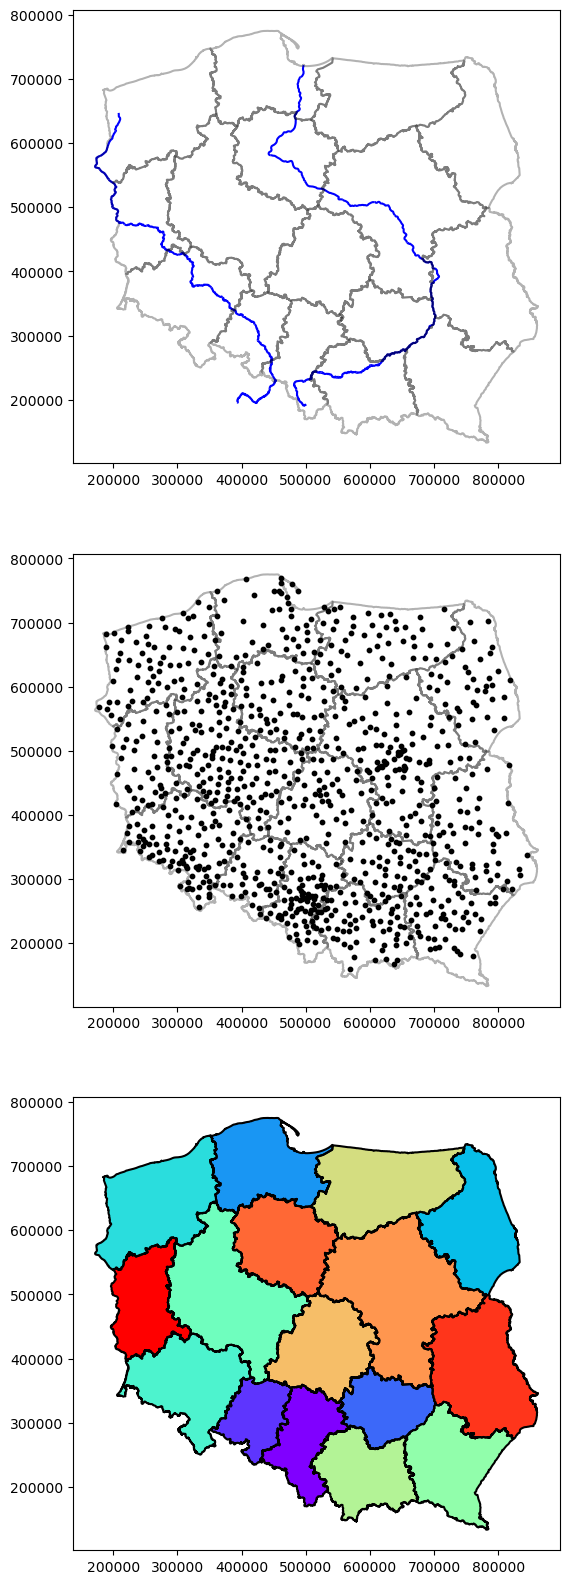

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=  3,figsize = (20,20))

gdb_Riv.plot(ax = ax1, markersize = 3, color = 'blue')
gdb_Woj.boundary.plot(ax=ax1, color = 'black', alpha = 0.3)

gdb_Miej.plot(ax = ax2,markersize = 10, color = 'black')
gdb_Woj.boundary.plot(ax=ax2, color = 'black', alpha = 0.3)

gdb_Woj.plot(ax = ax3, cmap = 'rainbow')
gdb_Woj.boundary.plot(ax=ax3, color = 'black')

### Mierzenie długości, pola powierzchni i odległości

#### a) Długość Wisły
Zmierzono długość Wisły, wynikową długość rzeki podano w kilometrach.

In [8]:
wisła = wisła.to_crs(2180)
wis = gpd.GeoSeries(wisła['geometry'])
length = wis.length/1000
print("Długość Wisły wynosi: ", length[1])

Długość Wisły wynosi:  1019.7577991167121


#### b) Pola powierzchni województw
Zmierzono powierzchnię województw wyniki zapisano do tablicy w kolumnie o nazwie "Pole". 

Wykorzystano dane do odpowiedzenia na pytanie jakie jest pole powierzchni Polski  w kilometrach kwadratowych.

In [9]:
area_Woj = gpd.GeoSeries(gdb_Woj['geometry'])
area_Woj = area_Woj.to_crs(2180)
gdb_Woj['Pole'] = area_Woj.area/1000000
sum = 0

for i in range (area_Woj.size):
    sum += gdb_Woj['Pole'][i]
print("Pole powierzchni Polski wynosi: ", sum)

Pole powierzchni Polski wynosi:  312506.6445773843


Text(56.472222222222214, 0.5, 'Y[m]')

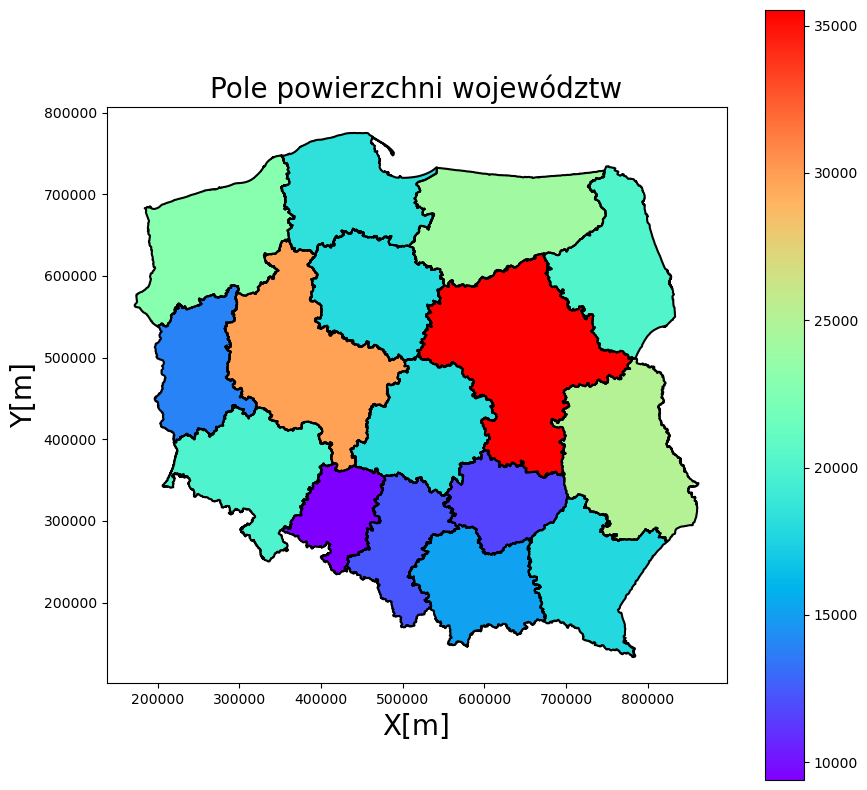

In [10]:
fig, ax = plt.subplots(ncols = 1,figsize = (10,10))
gdb_Woj.plot(ax=ax,column = 'Pole', cmap = 'rainbow',legend = True)
gdb_Woj.boundary.plot(ax=ax, color = 'black')
ax.set_title("Pole powierzchni województw", fontsize = 20)
ax.set_xlabel("X[m]", fontsize = 20)
ax.set_ylabel("Y[m]", fontsize = 20)

#### c) Odległość miast od Krakowa
Zmierzono odległość poszczególnych miast od Krakowa.  Wyniki zapisano do tablicy w kolumnie o nazwie "Odległość od Krakowa".

Wykorzystano dane do odpowiedzenia na pytanie w jakiej odległości od Krakowa leży Poznań (w kilometrach).

In [11]:
krakow = gdb_Miej[gdb_Miej['Nazwa'] == 'Kraków']
rest = gdb_Miej[gdb_Miej['Nazwa'] != 'Kraków']

rest = gpd.GeoSeries(gdb_Miej['geometry'])

rest = rest.to_crs(2180)
krakow = krakow.to_crs(2180)

dist = np.zeros(rest.size)

k = 0
for i in rest:
    dist[k] = krakow.distance(i)/1000
    k += 1
gdb_Miej['Odległość od Krakowa'] = dist

poznan = gdb_Miej[gdb_Miej['Nazwa'] == 'Poznań']
dist_P_K = poznan['Odległość od Krakowa']
print("Poznań leży w odległości: ", list(dist_P_K)[0]," kilometrów od Krakowa")

Poznań leży w odległości:  334.60495145299524  kilometrów od Krakowa


Text(56.472222222222214, 0.5, 'Y[m]')

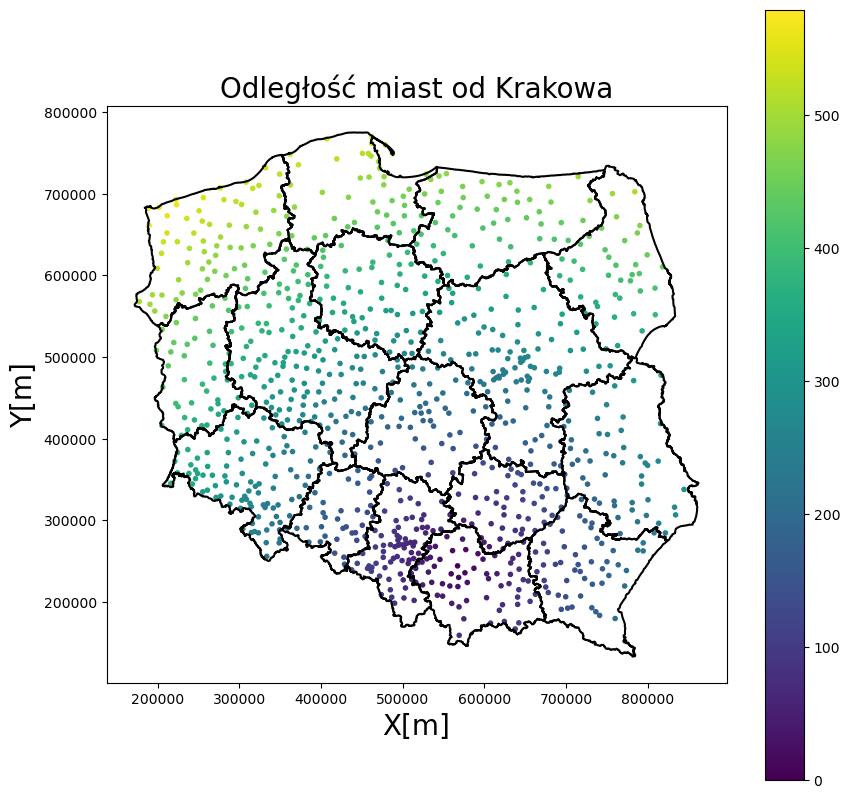

In [12]:
fig, ax = plt.subplots(figsize = (10,10))


gdb_Miej.plot(ax=ax,column = 'Odległość od Krakowa', cmap = 'viridis',markersize = 9,legend = True)
gdb_Woj.boundary.plot(ax=ax, color = 'black')
ax.set_title("Odległość miast od Krakowa", fontsize = 20)
ax.set_xlabel("X[m]", fontsize = 20)
ax.set_ylabel("Y[m]", fontsize = 20)

### Wykorzystanie prostych operacji geometrycznych

#### a) Miasta blisko Wisły

Sprawdzono które miasta leżą bliżej niż 20 km od Wisły. Zapisano wyniki do tablicy w kolumnie o nazwie "Blisko Wisły". 
Następnie wykorzystano dane do odpowiedzenia na pytanie ile miast leży bliżej niż 20 km od Wisły oraz przygotowania wizualiacji, na której oznaczono obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta zostaną wyróżnione kolorem względem pozostałych miast.

In [13]:
wisla_buff = (wisła['geometry'].buffer(20000))
wisla_buff = wisla_buff.to_crs(2180)

miasta_geo = gpd.GeoSeries(gdb_Miej['geometry'])
buf = np.zeros(miasta_geo.size)

k = 0
for i in miasta_geo:
    buf[k] = i.within(wisla_buff[1])
    k += 1

gdb_Miej['Blisko Wisły'] = buf
gdb_Miej[gdb_Miej['Blisko Wisły'] == 1]

,Nazwa,geometry,Odległość od Krakowa,Blisko Wisły
325,Aleksandrów Kujawski,POINT (479373.050 556833.540),324.646944,1.0
390,Alwernia,POINT (538609.780 243752.610),28.466435,1.0
447,Andrychów,POINT (524250.260 220924.610),48.765206,1.0
580,Annopol,POINT (700882.160 339274.920),164.115126,1.0
1590,Baranów Sandomierski,POINT (680313.770 295329.630),124.226587,1.0
...,...,...,...,...
99562,Zielonka,POINT (646779.830 495585.260),263.665807,1.0
100288,Zwoleń,POINT (680119.960 390824.150),185.100110,1.0
100534,Żabno,POINT (634756.490 253491.520),68.311882,1.0
101128,Żory,POINT (478119.750 242068.280),88.978914,1.0


Text(56.472222222222214, 0.5, 'Y[m]')

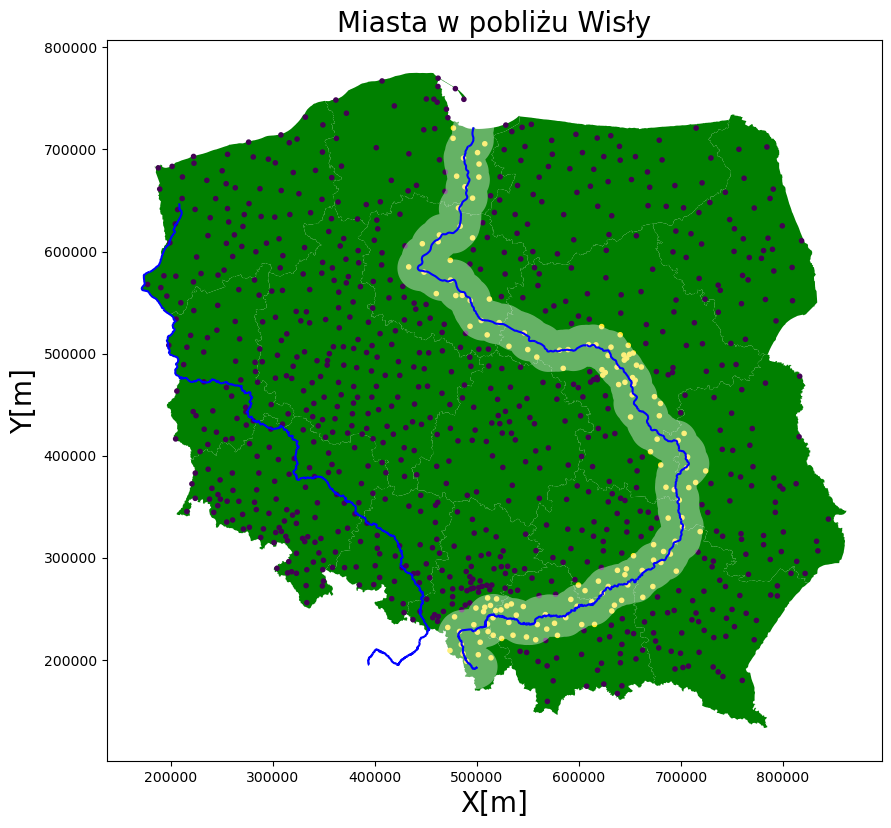

In [14]:
fig, ax = plt.subplots(figsize = (10,10))


gdb_Woj.plot(ax = ax, color = 'green')
gdb_Miej.plot(ax =ax , column = 'Blisko Wisły' , cmap = 'viridis',markersize = 9)
gdb_Riv.plot(ax = ax , color = 'blue')
wisla_buff.plot(ax =ax , color = 'white',alpha = 0.4)
ax.set_title("Miasta w pobliżu Wisły", fontsize = 20)
ax.set_xlabel("X[m]", fontsize = 20)
ax.set_ylabel("Y[m]", fontsize = 20)

#### b) Województwa, przez które przepływa Odra
Sprawdzono przez które województwa przepływa Odra. Zapisano wyniki do tablicy w kolumnie o nazwie "Odra w obrębie". 
Następnie wykorzystano dane do odpowiedzenia na pytanie przez ile województw przepływa Odra oraz przygotowania wizualiacji, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

In [15]:
woj_geo = gpd.GeoSeries(gdb_Woj['geometry'])
woj_geo = woj_geo.to_crs(2180)
inter = np.zeros(woj_geo.size)
odra_geo = gpd.GeoSeries(odra['geometry'])
odra_geo = odra_geo.to_crs(2180)
k = 0
for i in woj_geo:
    inter[k] = odra_geo.intersects(i)
    k += 1

gdb_Woj['Odra w obrębie'] = inter
Woj_Odra = gdb_Woj[gdb_Woj['Odra w obrębie'] == 1.0]
list(Woj_Odra)
print("Odra przepływa przez: ", len(Woj_Odra), " województw")

Odra przepływa przez:  5  województw


Text(56.472222222222214, 0.5, 'Y[m]')

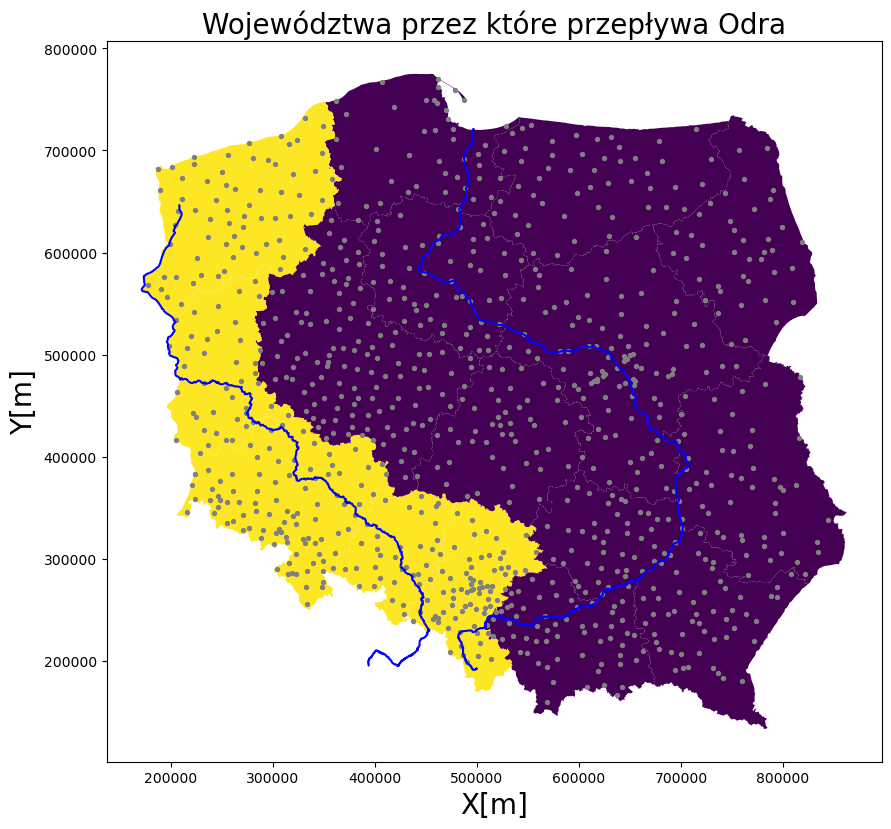

In [16]:
fig, ax = plt.subplots(figsize = (10,10))


gdb_Woj.plot(ax = ax,column = 'Odra w obrębie', cmap = 'viridis')
gdb_Miej.plot(ax = ax, color = 'grey',markersize = 8)
gdb_Riv.plot(ax = ax , color = 'blue')
ax.set_title("Województwa przez które przepływa Odra", fontsize = 20)
ax.set_xlabel("X[m]", fontsize = 20)
ax.set_ylabel("Y[m]", fontsize = 20)

### Generowanie procesu punktowego w obrębie poligonu

Przygotowano funkcję `homogeneous_poisson_on_polygon()`, która będzie wykorzystywała funkcję `homogeneous_poisson_on_rectangle()` do generowania jednorodnego rozkładu Poissona w obrębie dowolnego poligonu.

Następnie wykorzystano funkcję do wygenerowania rozkładu punktów o intensywności $10^{-8} pkt/m^2$ na obszarze województwa mazowieckiego.

#### a) Przygotowanie funkcji

In [17]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """

    minx = polygon.bounds[0]
    miny = polygon.bounds[1]
    
    maxx = polygon.bounds[2]
    maxy = polygon.bounds[3]
    
    points = homogeneous_poisson_on_rectangle(intensity,[minx,maxx],[miny,maxy])
    points_on_polygon = gpd.GeoSeries.from_xy(points['X'],points['Y'],crs = 2180)
    

    points_on_polygon = points_on_polygon[points_on_polygon.within(polygon)==1]
    return(points_on_polygon)

#### b) Wygenerowanie procesu

In [18]:
Mazowieckie = gdb_Woj[gdb_Woj['Nazwa'] == 'mazowieckie']

Mazowieckie_geo = Mazowieckie['geometry'][12]
Mazowieckie_geo
poisson = homogeneous_poisson_on_polygon(0.00000001,Mazowieckie_geo)

#### c) Wizualizacja

Text(74.28997662998556, 0.5, 'Y[m]')

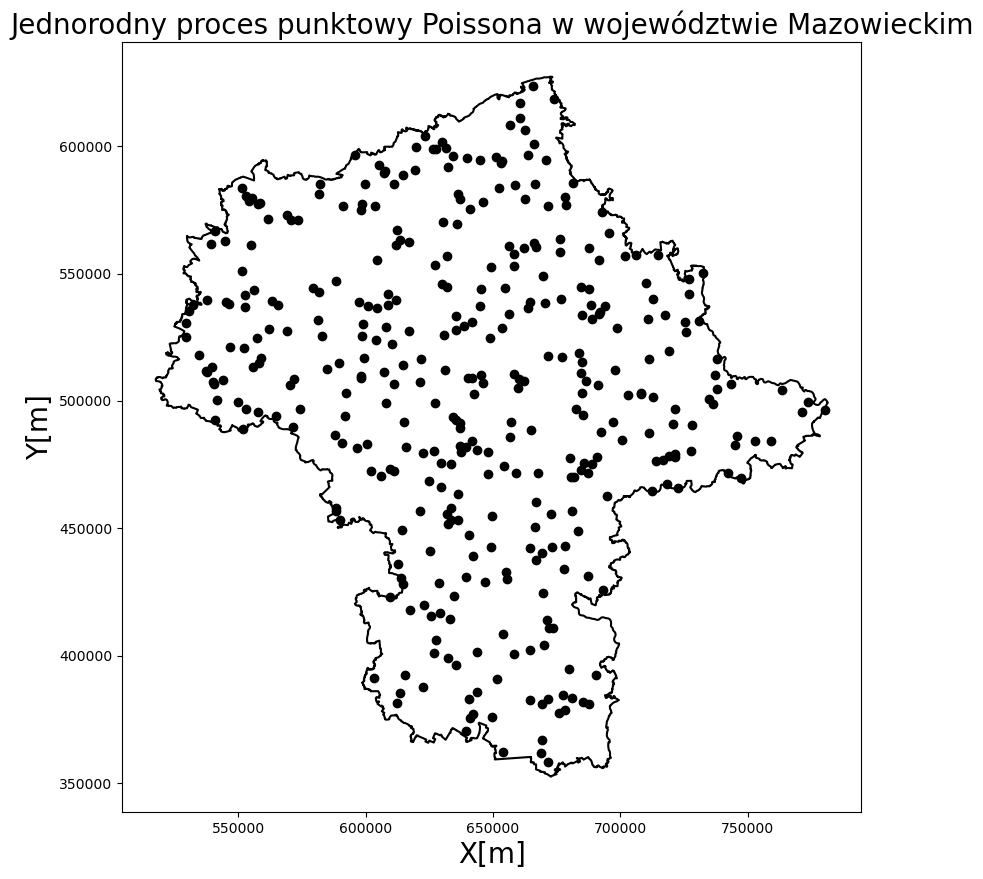

In [19]:
fig, ax = plt.subplots(figsize = (10,10))


poisson.plot(ax = ax,c = 'black')
Mazowieckie.boundary.plot(ax = ax ,color = 'black')
ax.set_title("Jednorodny proces punktowy Poissona w województwie Mazowieckim", fontsize = 20)
ax.set_xlabel("X[m]", fontsize = 20)
ax.set_ylabel("Y[m]", fontsize = 20)